In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
import base64
from IPython.display import HTML

pio.renderers.default = 'colab'

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"..\..\datasets\Students_turn\df_europe_clean.csv")

In [4]:
d_bumble = pd.read_csv(r"..\..\datasets\Students_turn\bumble_google_play_reviews.csv")
d_hinge = pd.read_csv(r"..\..\datasets\Students_turn\hinge_google_play_reviews.csv")
d_pof = pd.read_csv(r"..\..\datasets\Students_turn\pof_google_play_reviews.csv")
d_tinder = pd.read_csv(r"..\..\datasets\Students_turn\tinder_google_play_reviews.csv")

In [5]:
len(d_tinder)

658657

In [6]:
len(d_hinge)

81241

In [7]:
len(d_pof)

442135

In [8]:
len(d_bumble)

171406

In [9]:
data={'Tinder':658657, 'Bumble':171406, 'Hinge':81241, 'Plenty of Fish':442135}
d_combined = pd.DataFrame(list(data.items()), columns=['Platform', 'Users'])
print(d_combined)

         Platform   Users
0          Tinder  658657
1          Bumble  171406
2           Hinge   81241
3  Plenty of Fish  442135


In [10]:
d_bumble.duplicated().sum()

np.int64(0)

In [11]:
d_tinder.duplicated().sum()

np.int64(0)

In [12]:
d_hinge.duplicated().sum()

np.int64(0)

In [13]:
d_pof.duplicated().sum()

np.int64(0)

In [14]:
d_combined

,Platform,Users
0,Tinder,658657
1,Bumble,171406
2,Hinge,81241
3,Plenty of Fish,442135


In [15]:
d_combined.sort_values(by='Users', ascending=False, inplace=True)

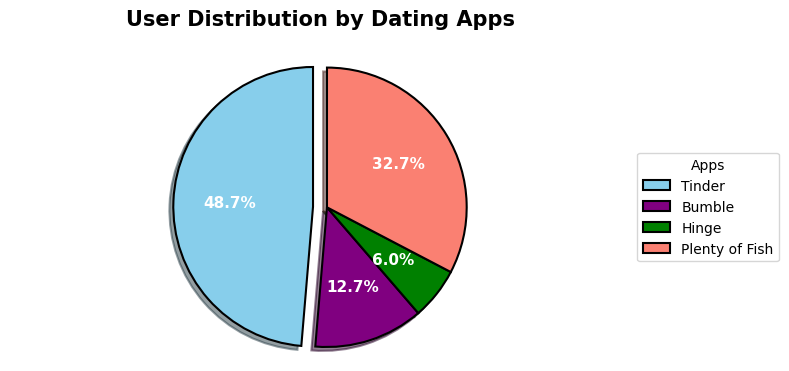

In [16]:
values = [658657, 171406, 81241, 442135]
labels = ['Tinder', 'Bumble', 'Hinge', 'Plenty of Fish']


colors = ['skyblue', 'purple', 'green', 'salmon']

# Create the figure and a single subplot
fig, ax = plt.subplots(figsize=(8, 4))

# Use explode to pull a slice out.
# The list should have a value for each slice; a value > 0 moves it out.
explode = [0.1, 0, 0, 0] # Explode the first slice (Tinder)

# Create the pie chart with a shadow and bold labels
wedges, texts, autotexts = ax.pie(
    values,
    colors=colors,
    autopct='%1.1f%%', # Format percentage text
    shadow=True, # Add a shadow for depth
    startangle=90, # Start the first slice at the top
    wedgeprops=dict(edgecolor='black', linewidth=1.5), # Add a border line
    explode=explode # Apply the explode effect
)

# Customize the text inside the slices
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(11)
    text.set_weight('bold')

# Set the title
ax.set_title('User Distribution by Dating Apps', fontsize=15, fontweight='bold', pad=20)

# Add the legend
ax.legend(wedges, labels, title="Apps", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set aspect ratio to be equal so that pie is a circle.
ax.axis('equal')

# Display the plot
plt.show()


In [17]:
d_combined

,Platform,Users
0,Tinder,658657
3,Plenty of Fish,442135
1,Bumble,171406
2,Hinge,81241


In [18]:
d_combined['Total Count']=d_combined['Users'].sum()

In [19]:
d_combined['Percentage']=d_combined['Users']/d_combined['Total Count']*100
d_combined['Percentage']=d_combined['Percentage'].round(2)
d_combined['Percentage']=d_combined['Percentage'].map(lambda x: f"{x}%")
d_combined

,Platform,Users,Total Count,Percentage
0,Tinder,658657,1353439,48.67%
3,Plenty of Fish,442135,1353439,32.67%
1,Bumble,171406,1353439,12.66%
2,Hinge,81241,1353439,6.0%


In [20]:
d_combined.to_csv('d_combined.csv', index=False)
csv_content_clean = d_combined.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="d_combined.csv">Click here to download d_combined.csv</a>'
display(HTML(download_link_clean))

In [21]:
df.columns

Index(['ID', 'Number of conversations', 'Average Conversation Length',
       'Average Conversation Length in Days',
       'Number of ghostings after 1st message', 'Number of matches',
       'Minimum of Age filter', 'Maximum of Age filter', 'Country',
       'Education', 'Gender', 'Interests in gender', 'instagram', 'Job title',
       'Age', 'Group'],
      dtype='object')

In [22]:
df.Country

0              Norway
1             Belgium
2              Norway
3              France
4              France
            ...      
390    United Kingdom
391           Belgium
392       Netherlands
393           Austria
394    United Kingdom
Name: Country, Length: 395, dtype: object

In [23]:
custom_color_map_interest = {'Interest in Women': 'red',
                    'Interest in Men': 'blue',
                    'Interest in Men and Women': 'green'}

In [24]:
df['Interests in gender'].value_counts()

Interests in gender
Interest in Women            354
Interest in Men               28
Interest in Men and Women     13
Name: count, dtype: int64

In [25]:
custom_color_map_gender={'Women': 'coral',
                        'Men': 'purple'}

In [26]:
len(df)

395

In [27]:
df_map=df.groupby('Country').size().reset_index(name='Count')

In [28]:
fig = px.choropleth(df_map,
                    locations='Country',
                    locationmode='country names',
                    color='Count',
                    title='Distribution of Users in European countries',
                    scope='europe', 
                    color_discrete_map={
                        'High score of happiness': 'green',
                        'Low score of happiness': 'red',
                        'Middle score of happiness': 'lightpink'
                    }
                   )
fig.update_layout(showlegend=False, title_x=0.5, title_font_weight='bold',title_font_size=24)
fig.update_geos(
    # Change the map's projection style
    projection_type="natural earth",
    
    # Customize the country borders
    showcountries=True,
    countrycolor="black",
    
    # Customize the ocean and land colors
    showocean=True,
    oceancolor="lightblue",
    showland=True,
    landcolor="lightgrey"
)
fig.show()

In [29]:
df_map2=df_map

In [30]:
df_map.to_csv('df_map_2.csv', index=False)

In [31]:
df_map.to_csv('df_map.csv', index=False)
csv_content_clean = df_map.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_map.csv">Click here to download df_map.csv</a>'
display(HTML(download_link_clean))

In [32]:
df_map['Country'].to_list()

['Austria',
 'Belarus',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Lithuania',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Slovakia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom']

In [33]:
map_geo={'Country':['Austria','Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece','Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Lithuania',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Slovakia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom'],
         'Latitude':[47.52,
53.71,
50.5,
42.73,
45.08,
49.82,
56.26,
58.6,
61.92,
46.23,
51.17,
39.07,
47.16,
64.96,
53.78,
41.87,
55.17,
49.82,
52.13,
60.47,
51.92,
39.42,
45.94,
61.52,
48.67,
40.46,
60.13,
46.82,
48.38,
55.38], 'Longitude':[14.55,
27.95,
4.47,
25.49,
16.23,
15.47,
9.5,
25.01,
25.75,
2.21,
10.45,
21.82,
19.5,
-19.02,
-7.31,
12.57,
23.88,
6.13,
5.29,
8.47,
19.14,
-8.22,
24.97,
105.32,
19.7,
-3.75,
18.64,
8.23,
31.18,
-3.44]}

In [34]:
map_geo_to_df=pd.DataFrame(map_geo)

In [35]:
map_geo_to_df

,Country,Latitude,Longitude
0,Austria,47.52,14.55
1,Belarus,53.71,27.95
2,Belgium,50.50,4.47
3,Bulgaria,42.73,25.49
4,Croatia,45.08,16.23
5,Czechia,49.82,15.47
6,Denmark,56.26,9.50
7,Estonia,58.60,25.01
8,Finland,61.92,25.75
9,France,46.23,2.21


In [36]:
df_proportion=df.groupby(['Country', 'Gender']).size().reset_index(name='Count')

In [37]:
merged_map_geo=pd.merge(df_proportion,map_geo_to_df, on='Country', how='left')

In [38]:
merged_map_geo

,Country,Gender,Count,Latitude,Longitude
0,Austria,Men,11,47.52,14.55
1,Austria,Women,3,47.52,14.55
2,Belarus,Men,1,53.71,27.95
3,Belgium,Men,16,50.50,4.47
4,Bulgaria,Men,1,42.73,25.49
5,Croatia,Men,2,45.08,16.23
6,Czechia,Men,11,49.82,15.47
7,Denmark,Men,15,56.26,9.50
8,Denmark,Women,3,56.26,9.50
9,Estonia,Men,3,58.60,25.01


In [39]:
merged_map_geo.to_csv('merged_map_geo.csv', index=False)
csv_content_clean = merged_map_geo.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="merged_map_geo.csv">Click here to download merged_map_geo.csv</a>'
display(HTML(download_link_clean))

In [40]:
df_gender_distribution=df.groupby('Gender').size().reset_index(name='Count')
df_gender_distribution

,Gender,Count
0,Men,368
1,Women,27


In [41]:
total_count = df_gender_distribution['Count'].sum()
print(f"Total count: {total_count}")
df_gender_distribution['Percentage'] = (df_gender_distribution['Count'] / total_count * 100).round()

df_gender_distribution

Total count: 395


,Gender,Count,Percentage
0,Men,368,93.0
1,Women,27,7.0


In [42]:
df_gender_distribution.to_csv('df_gender_distribution.csv', index=False)
csv_content_clean = df_gender_distribution.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_gender_distribution.csv">Click here to download df_gender_distribution.csv</a>'
display(HTML(download_link_clean))

In [43]:
df_proportion['Total_Count'] = df_proportion.groupby('Country')['Count'].transform('sum')

# 3. Calculate the proportion of the gender count relative to the country's total count.
# The resulting 'Proportion' value in a row ALWAYS corresponds to the 'Gender'
# in that same row (e.g., if the row has 'F', the proportion is for Females).
df_proportion['Proportion'] = df_proportion['Count'] / df_proportion['Total_Count']

# 4. Format the Proportion column for clean display (optional, but helpful).
df_proportion['Proportion'] = df_proportion['Proportion'].round(4)


print("Final df_map with Total Count and Proportion:")
print(df_proportion)
print("-" * 50)

# Example output for United States (F=40, M=80):
# Total = 120
# F Proportion = 40/120 = 0.3333
# M Proportion = 80/120 = 0.6667


Final df_map with Total Count and Proportion:
           Country Gender  Count  Total_Count  Proportion
0          Austria    Men     11           14      0.7857
1          Austria  Women      3           14      0.2143
2          Belarus    Men      1            1      1.0000
3          Belgium    Men     16           16      1.0000
4         Bulgaria    Men      1            1      1.0000
5          Croatia    Men      2            2      1.0000
6          Czechia    Men     11           11      1.0000
7          Denmark    Men     15           18      0.8333
8          Denmark  Women      3           18      0.1667
9          Estonia    Men      3            3      1.0000
10         Finland    Men     26           30      0.8667
11         Finland  Women      4           30      0.1333
12          France    Men     22           23      0.9565
13          France  Women      1           23      0.0435
14         Germany    Men     49           55      0.8909
15         Germany  Women 

In [44]:
df_proportion[df_proportion['Gender']=='Women'].sort_values(by='Proportion', ascending=True).reset_index().head(3)

,index,Country,Gender,Count,Total_Count,Proportion
0,13,France,Women,1,23,0.0435
1,25,Netherlands,Women,1,22,0.0455
2,38,Switzerland,Women,1,18,0.0556


In [45]:
df_proportion_big=df_proportion[df_proportion['Country'].isin(['France', 'Netherlands', 'Switzerland'])]
df_proportion_big=df_proportion_big.sort_values(by='Proportion', ascending=False)
df_proportion_big

,Country,Gender,Count,Total_Count,Proportion
12,France,Men,22,23,0.9565
24,Netherlands,Men,21,22,0.9545
37,Switzerland,Men,17,18,0.9444
38,Switzerland,Women,1,18,0.0556
25,Netherlands,Women,1,22,0.0455
13,France,Women,1,23,0.0435


In [46]:
fig=px.bar(df_proportion_big.sort_values(by='Proportion', ascending=False), x='Country', y='Count', color='Gender',barmode='group', # Group the bars
title="Top 5 countries with the biggest dispropotion in User's gender",
color_discrete_map=custom_color_map_gender
)
fig.show()

In [47]:
df_proportion_big_new={'Country':['France','Netherlands', 'Switzerland'],
                       'Men': [22,21,17],
                       'Women':[1,1,1],
                      'Total_Count': [23,22,18]}
df_proportion_big_new_to_df=pd.DataFrame(df_proportion_big_new)
df_proportion_big_new_to_df

,Country,Men,Women,Total_Count
0,France,22,1,23
1,Netherlands,21,1,22
2,Switzerland,17,1,18


In [48]:
df_proportion_big_new_to_df.to_csv('df_proportion_big_new_to_df', index=False)
csv_content_clean = df_proportion_big_new_to_df.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_proportion_big_new_to_df.csv">Click here to download df_proportion_big_new_to_df.csv</a>'
display(HTML(download_link_clean))

In [49]:
df_proportion[(df_proportion['Gender']=='Men')&(df_proportion['Total_Count']>10)].sort_values(by='Proportion', ascending=True).reset_index().head(5)

,index,Country,Gender,Count,Total_Count,Proportion
0,0,Austria,Men,11,14,0.7857
1,7,Denmark,Men,15,18,0.8333
2,10,Finland,Men,26,30,0.8667
3,14,Germany,Men,49,55,0.8909
4,28,Poland,Men,22,24,0.9167


In [50]:
df_proportion_small=df_proportion[df_proportion['Country'].isin(['Germany', 'Finland', 'Poland', 'Denmark', 'Austria'])]
df_proportion_small=df_proportion_small.sort_values(by='Proportion', ascending=False)
df_proportion_small

,Country,Gender,Count,Total_Count,Proportion
28,Poland,Men,22,24,0.9167
14,Germany,Men,49,55,0.8909
10,Finland,Men,26,30,0.8667
7,Denmark,Men,15,18,0.8333
0,Austria,Men,11,14,0.7857
1,Austria,Women,3,14,0.2143
8,Denmark,Women,3,18,0.1667
11,Finland,Women,4,30,0.1333
15,Germany,Women,6,55,0.1091
29,Poland,Women,2,24,0.0833


In [51]:
fig=px.bar(df_proportion_small.sort_values(by='Proportion', ascending=True), x='Country', y='Count', color='Gender',barmode='group', # Group the bars
title="Top 5 countries with the smallest dispropotion in User's gender",
color_discrete_map=custom_color_map_gender
)
fig.show()

In [52]:
df_proportion_small_new={'Country':['Austria','Denmark', 'Finland', 'Germany', 'Poland'],
                               'Men':[11, 15, 26, 49, 22],
                               'Women':[3,3,4,6,2]}
df_proportion_small_new_to_df=pd.DataFrame(df_proportion_small_new)

In [53]:
df_proportion_small_new_to_df.to_csv('df_proportion_small_new_to_df', index=False)
csv_content_clean = df_proportion_small_new_to_df.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_proportion_small_new_to_df.csv">Click here to download df_proportion_small_new_to_df.csv</a>'
display(HTML(download_link_clean))

In [54]:
df_gender_distribution

,Gender,Count,Percentage
0,Men,368,93.0
1,Women,27,7.0


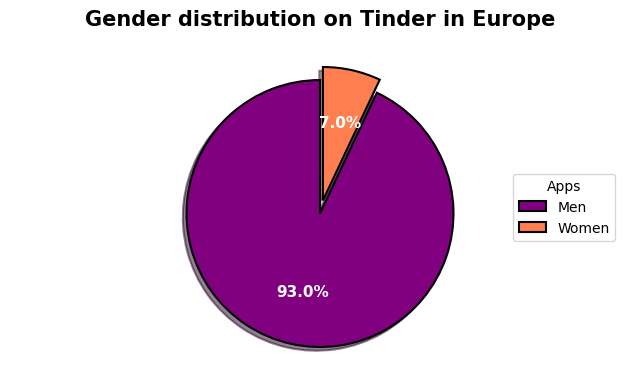

In [55]:
values = [93, 7]
labels = ['Men', 'Women']


custom_color_map = {'Men':'purple',
           'Women':'coral'}

colors = [custom_color_map[label] for label in labels]


# Create the figure and a single subplot
fig, ax = plt.subplots(figsize=(8, 4))

# Use explode to pull a slice out.
# The list should have a value for each slice; a value > 0 moves it out.
explode = [0.1, 0] # Explode the first slice (Tinder)

# Create the pie chart with a shadow and bold labels
wedges, texts, autotexts = ax.pie(
    values,
    colors=colors,
    autopct='%1.1f%%', # Format percentage text
    shadow=True, # Add a shadow for depth
    startangle=90, # Start the first slice at the top
    wedgeprops=dict(edgecolor='black', linewidth=1.5), # Add a border line
    explode=explode # Apply the explode effect
)

# Customize the text inside the slices
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(11)
    text.set_weight('bold')

# Set the title
ax.set_title('Gender distribution on Tinder in Europe', fontsize=15, fontweight='bold', pad=20)

# Add the legend
ax.legend(wedges, labels, title="Apps", loc="center left", bbox_to_anchor=(0.8, 0, 0.5, 1))

# Set aspect ratio to be equal so that pie is a circle.
ax.axis('equal')

# Display the plot
plt.show()

In [56]:
df_gender_distribution.to_csv('df_gender_distribution', index=False)
csv_content_clean = df_gender_distribution.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_gender_distribution.csv">Click here to download df_gender_distribution.csv</a>'
display(HTML(download_link_clean))

In [57]:
df[df['Gender']=='Men'].Age.min()

np.int64(15)

In [58]:
df[df['Gender']=='Women'].Age.min()

np.int64(18)

In [59]:
df[df['Gender']=='Men'].Age.max()

np.int64(51)

In [60]:
df[df['Gender']=='Women'].Age.max()

np.int64(35)

In [61]:
df_agg_min = df[(df['Age']>=18)&(df['Age']<=35)].groupby(['Age', 'Gender'], as_index=False)['Minimum of Age filter'].mean()

# Define a custom color map for 'Gender'


fig = px.line(
    df_agg_min,
    x='Age',
    y='Minimum of Age filter',
    color='Gender',
    color_discrete_map=custom_color_map_gender,
    title='Minimum of Age filter vs. Age<br><sup><i>by Gender'
)

# Customize the lines and add labels
fig.update_traces(
    mode='lines+markers',
    hovertemplate=None,
    hoverinfo='skip'
)

# Customize the axes and layout
fig.update_layout(
    title_font=dict(size=24, weight='bold'),
    xaxis_title='Age',
    yaxis_title='Minimum of Age filter',
    title_x=0.5,
    width=700, # Set the width of the plot
    height=450,
    showlegend=True,
    template='plotly_white'
)

# Show the plot
fig.show()

In [62]:
df[(df['Gender']=='Women')&(df['Age']==28)]

,ID,Number of conversations,Average Conversation Length,Average Conversation Length in Days,Number of ghostings after 1st message,Number of matches,Minimum of Age filter,Maximum of Age filter,Country,Education,Gender,Interests in gender,instagram,Job title,Age,Group
136,de14c049d9bc38720b566ac98a1f3998,8084,3.7,3.0,4408,14874,18,80,Germany,Has high school and/or college education,Women,Interest in Men,True,Writer,28,Age group 26-35


In [63]:
df_agg_max = df[(df['Age']>=18)&(df['Age']<=35)&(df['Maximum of Age filter']!=80)].groupby(['Age', 'Gender'], as_index=False)['Maximum of Age filter'].mean()

# Define a custom color map for 'Gender'


fig = px.line(
    df_agg_max,
    x='Age',
    y='Maximum of Age filter',
    color='Gender',
    color_discrete_map=custom_color_map_gender,
    title='Maximum of Age filter vs. Age<br><sup><i>by Gender'
)

# Customize the lines and add labels
fig.update_traces(
    mode='lines+markers',
    hovertemplate=None,
    hoverinfo='skip'
)

# Customize the axes and layout
fig.update_layout(
    title_font=dict(size=24, weight='bold'),
    xaxis_title='Age',
    yaxis_title='Maximum of Age filter',
    title_x=0.5,
    width=700, # Set the width of the plot
    height=450,
    showlegend=True,
    template='plotly_white'
)

# Show the plot
fig.show()

In [64]:
df_agg_min[df_agg_min['Gender']=='Women']['Age'].to_list()

[18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 35]

In [65]:
df_agg_max[df_agg_max['Gender']=='Women']['Age'].to_list()

[18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 32, 35]

In [66]:
df_agg_min[df_agg_min['Gender']=='Women']['Minimum of Age filter'].to_list()

[21.666666666666668,
 19.5,
 21.0,
 21.666666666666668,
 22.0,
 22.0,
 24.5,
 22.5,
 26.5,
 18.0,
 26.0,
 34.0,
 27.0,
 32.0]

In [67]:
df_agg_max[df_agg_max['Gender']=='Women']['Maximum of Age filter'].to_list()

[29.0,
 31.25,
 30.666666666666668,
 29.333333333333332,
 28.0,
 37.5,
 28.5,
 35.5,
 35.5,
 42.0,
 38.0,
 44.0,
 45.0]

In [68]:
df_agg_min[(df_agg_min['Gender']=='Men')&(df_agg_min['Age'].isin([18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 35]))]['Minimum of Age filter'].to_list()

[18.75,
 18.70967741935484,
 18.36842105263158,
 19.0,
 19.055555555555557,
 19.838709677419356,
 19.96,
 19.22222222222222,
 20.571428571428573,
 22.666666666666668,
 21.333333333333332,
 20.333333333333332,
 23.625,
 23.571428571428573]

In [69]:
df_agg_max[(df_agg_max['Gender']=='Men')&(df_agg_max['Age'].isin([18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 32, 35]))]['Maximum of Age filter'].to_list()

[25.5,
 28.516129032258064,
 28.857142857142858,
 29.5,
 29.34285714285714,
 27.366666666666667,
 29.291666666666668,
 33.22222222222222,
 32.857142857142854,
 34.0,
 36.5,
 35.375,
 37.666666666666664]

In [70]:
df_agg_min_new={'Age':[18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 35],
                'Men':[18.75,
 18.70967741935484,
 18.36842105263158,
 19.0,
 19.055555555555557,
 19.838709677419356,
 19.96,
 19.22222222222222,
 20.571428571428573,
 22.666666666666668,
 21.333333333333332,
 20.333333333333332,
 23.625,
 23.571428571428573],
                'Women':[21.666666666666668,
 19.5,
 21.0,
 21.666666666666668,
 22.0,
 22.0,
 24.5,
 22.5,
 26.5,
 18.0,
 26.0,
 34.0,
 27.0,
 32.0]}

In [71]:
df_agg_min_new_to_df=pd.DataFrame(df_agg_min_new)

In [72]:
df_agg_max_new={'Age':[18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 32, 35],
                'Men':[25.5,
 28.516129032258064,
 28.857142857142858,
 29.5,
 29.34285714285714,
 27.366666666666667,
 29.291666666666668,
 33.22222222222222,
 32.857142857142854,
 34.0,
 36.5,
 35.375,
 37.666666666666664],
                'Women':[29.0,
 31.25,
 30.666666666666668,
 29.333333333333332,
 28.0,
 37.5,
 28.5,
 35.5,
 35.5,
 42.0,
 38.0,
 44.0,
 45.0]}

In [73]:
df_agg_max_new_to_df=pd.DataFrame(df_agg_max_new)

In [74]:
df_agg_min_new_to_df.to_csv('df_agg_min_new_to_df', index=False)
csv_content_clean = df_agg_min_new_to_df.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_agg_min_new_to_df.csv">Click here to download df_agg_min_new_to_df.csv</a>'
display(HTML(download_link_clean))

In [75]:
df_agg_max_new_to_df.to_csv('df_agg_max_new_to_df', index=False)
csv_content_clean = df_agg_max_new_to_df.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_agg_max_new_to_df.csv">Click here to download df_agg_max_new_to_df.csv</a>'
display(HTML(download_link_clean))

In [76]:
df_jobs_count=df.groupby(['Job title', 'Gender']).size().reset_index(name='Count') 
df_jobs_count

,Job title,Gender,Count
0,30 euros away from collecting bottles,Men,1
1,3d animator,Men,1
2,Accountant,Men,2
3,Android developer,Men,1
4,App developer,Men,2
...,...,...,...
123,Website owner,Men,1
124,Website programmeur,Men,1
125,Woke bae,Men,1
126,Works,Women,1


In [77]:
df_women_edu_matches=df[df['Gender']=='Women'].groupby('Education')['Number of matches'].agg('mean').reset_index()

In [78]:
df_men_edu_matches=df[df['Gender']=='Men'].groupby('Education')['Number of matches'].agg('mean').reset_index()

In [79]:
df_women_edu_matches

,Education,Number of matches
0,Has high school and/or college education,2666.375
1,Has no high school or college education,396.000


In [80]:
df_men_edu_matches

,Education,Number of matches
0,Has high school and/or college education,983.106383
1,Has no high school or college education,248.847352


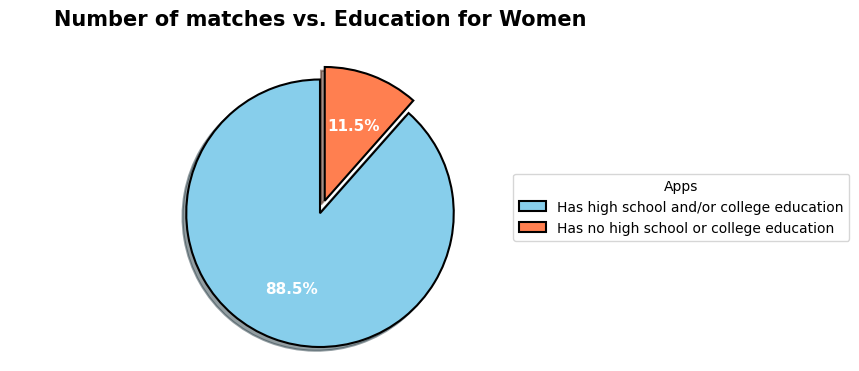

In [81]:
values = [2666.375, 347.250]
labels = ['Has high school and/or college education', 'Has no high school or college education']


custom_color_map = {'Has high school and/or college education':'skyblue',
           'Has no high school or college education':'coral'}

colors = [custom_color_map[label] for label in labels]


# Create the figure and a single subplot
fig, ax = plt.subplots(figsize=(8, 4))

# Use explode to pull a slice out.
# The list should have a value for each slice; a value > 0 moves it out.
explode = [0.1, 0] # Explode the first slice (Tinder)

# Create the pie chart with a shadow and bold labels
wedges, texts, autotexts = ax.pie(
    values,
    colors=colors,
    autopct='%1.1f%%', # Format percentage text
    shadow=True, # Add a shadow for depth
    startangle=90, # Start the first slice at the top
    wedgeprops=dict(edgecolor='black', linewidth=1.5), # Add a border line
    explode=explode # Apply the explode effect
)

# Customize the text inside the slices
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(11)
    text.set_weight('bold')

# Set the title
ax.set_title('Number of matches vs. Education for Women', fontsize=15, fontweight='bold', pad=20)

# Add the legend
ax.legend(wedges, labels, title="Apps", loc="center left", bbox_to_anchor=(0.8, 0, 0.5, 1))

# Set aspect ratio to be equal so that pie is a circle.
ax.axis('equal')

# Display the plot
plt.show()

In [82]:
df_women_edu_matches.to_csv('df_women_edu_matches', index=False)
csv_content_clean = df_women_edu_matches.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_women_edu_matches.csv">Click here to download df_women_edu_matches.csv</a>'
display(HTML(download_link_clean))

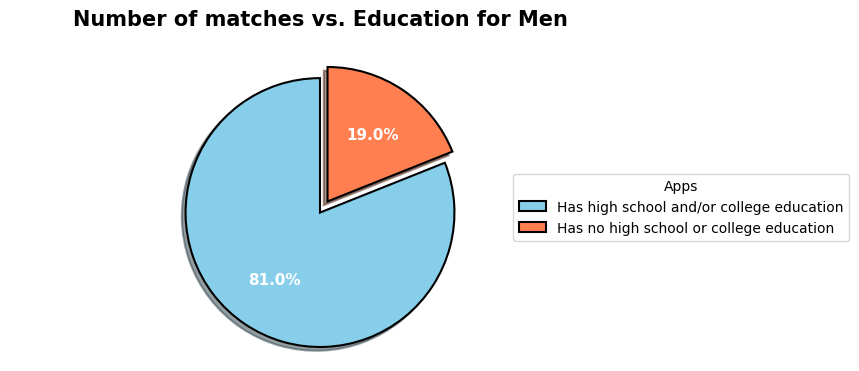

In [83]:
values = [1083.078947, 253.309028]
labels = ['Has high school and/or college education', 'Has no high school or college education']


custom_color_map = {'Has high school and/or college education':'skyblue',
           'Has no high school or college education':'coral'}

colors = [custom_color_map[label] for label in labels]

# Create the figure and a single subplot
fig, ax = plt.subplots(figsize=(8, 4))

# Use explode to pull a slice out.
# The list should have a value for each slice; a value > 0 moves it out.
explode = [0.1, 0] # Explode the first slice (Tinder)

# Create the pie chart with a shadow and bold labels
wedges, texts, autotexts = ax.pie(
    values,
    colors=colors,
    autopct='%1.1f%%', # Format percentage text
    shadow=True, # Add a shadow for depth
    startangle=90, # Start the first slice at the top
    wedgeprops=dict(edgecolor='black', linewidth=1.5), # Add a border line
    explode=explode # Apply the explode effect
)

# Customize the text inside the slices
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(11)
    text.set_weight('bold')

# Set the title
ax.set_title('Number of matches vs. Education for Men', fontsize=15, fontweight='bold', pad=20)

# Add the legend
ax.legend(wedges, labels, title="Apps", loc="center left", bbox_to_anchor=(0.8, 0, 0.5, 1))

# Set aspect ratio to be equal so that pie is a circle.
ax.axis('equal')

# Display the plot
plt.show()

In [84]:
df_men_edu_matches.to_csv('df_men_edu_matches', index=False)
csv_content_clean = df_men_edu_matches.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_men_edu_matches.csv">Click here to download df_men_edu_matches.csv</a>'
display(HTML(download_link_clean))

In [85]:
df_women_edu_matches

,Education,Number of matches
0,Has high school and/or college education,2666.375
1,Has no high school or college education,396.000


In [86]:
df_men_edu_matches

,Education,Number of matches
0,Has high school and/or college education,983.106383
1,Has no high school or college education,248.847352


In [87]:
df_edu_matches_new={'Education':['Has no high school or college education','Has high school and/or college education'],
                                 'Men':[248.847352, 983.106383],
                    'Women':[396.000, 2666.375]}

In [88]:
df_edu_matches_new_to_df=pd.DataFrame(df_edu_matches_new)

In [89]:
df_edu_matches_new_to_df.to_csv('df_edu_matches_new_to_df', index=False)
csv_content_clean = df_edu_matches_new_to_df.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_edu_matches_new_to_df.csv">Click here to download df_edu_matches_new_to_df.csv</a>'
display(HTML(download_link_clean))

In [90]:
df_edu_ghosting=df.groupby(['Education', 'Gender'])['Number of ghostings after 1st message'].agg('mean').reset_index()
df_edu_ghosting

,Education,Gender,Number of ghostings after 1st message
0,Has high school and/or college education,Men,26.063830
1,Has high school and/or college education,Women,626.500000
2,Has no high school or college education,Men,6.323988
3,Has no high school or college education,Women,58.473684


In [91]:
df_edu_ghosting_new={'Education':['Has no high school or college education','Has high school and/or college education'],
                                 'Men':[6.323988, 26.063830],
                    'Women':[58.473684, 626.500000]}
df_edu_ghosting_new_to_df=pd.DataFrame(df_edu_ghosting_new)

In [92]:
df_edu_ghosting_new_to_df.to_csv('df_edu_ghosting_new_to_df', index=False)
csv_content_clean = df_edu_ghosting_new_to_df.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_edu_ghosting_new_to_df.csv">Click here to download df_edu_ghosting_new_to_df.csv</a>'
display(HTML(download_link_clean))

In [93]:
df.groupby(['Gender', 'Education']).size().reset_index(name='Count')

,Gender,Education,Count
0,Men,Has high school and/or college education,47
1,Men,Has no high school or college education,321
2,Women,Has high school and/or college education,8
3,Women,Has no high school or college education,19


In [94]:
data_edu={'Education':['Has high school and/or college education', 'Has no high school or college education'],
          'Men':[47, 321],
          'Women':[8,19]}
data_edu_df=pd.DataFrame(data_edu)

In [95]:
data_edu_df

,Education,Men,Women
0,Has high school and/or college education,47,8
1,Has no high school or college education,321,19


In [96]:
data_edu_df.to_csv('data_edu_df', index=False)
csv_content_clean = data_edu_df.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="data_edu_df.csv">Click here to download data_edu_df.csv</a>'
display(HTML(download_link_clean))

In [97]:
df_interest=df.groupby(['Country','Interests in gender']).size().reset_index(name='Count')

In [98]:
df_interest['Total_Count'] = df_interest.groupby('Country')['Count'].transform('sum')

# 3. Calculate the proportion of the gender count relative to the country's total count.
# The resulting 'Proportion' value in a row ALWAYS corresponds to the 'Gender'
# in that same row (e.g., if the row has 'F', the proportion is for Females).
df_interest['Proportion'] = df_interest['Count'] / df_proportion['Total_Count']

# 4. Format the Proportion column for clean display (optional, but helpful).
df_interest['Proportion'] = df_interest['Proportion'].round(4)


print("Final df_map with Total Count and Proportion:")
print(df_interest)
print("-" * 50)

# Example output for United States (F=40, M=80):
# Total = 120
# F Proportion = 40/120 = 0.3333
# M Proportion = 80/120 = 0.6667


Final df_map with Total Count and Proportion:
           Country        Interests in gender  Count  Total_Count  Proportion
0          Austria            Interest in Men      3           14      0.2143
1          Austria  Interest in Men and Women      1           14      0.0714
2          Austria          Interest in Women     10           14     10.0000
3          Belarus          Interest in Women      1            1      0.0625
4          Belgium  Interest in Men and Women      1           16      1.0000
5          Belgium          Interest in Women     15           16      7.5000
6         Bulgaria          Interest in Women      1            1      0.0909
7          Croatia          Interest in Women      2            2      0.1111
8          Czechia          Interest in Women     11           11      0.6111
9          Denmark            Interest in Men      3           18      1.0000
10         Denmark  Interest in Men and Women      1           18      0.0333
11         Denmark

In [99]:
df_countries_matches=df.groupby('Country')['Number of matches'].agg('mean').reset_index().head(15)
df_countries_matches['Country'].unique()

array(['Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland'], dtype=object)

In [100]:
df_countries_conv=df.groupby('Country')['Number of conversations'].agg('mean').reset_index().head(15)
df_countries_conv['Country'].unique()

array(['Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland'], dtype=object)

In [101]:
df_interest_countries=df[df['Country'].isin(['Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland'])].groupby(['Country', 'Interests in gender']).size().reset_index(name='Count')
df_interest_countries

,Country,Interests in gender,Count
0,Austria,Interest in Men,3
1,Austria,Interest in Men and Women,1
2,Austria,Interest in Women,10
3,Belarus,Interest in Women,1
4,Belgium,Interest in Men and Women,1
5,Belgium,Interest in Women,15
6,Bulgaria,Interest in Women,1
7,Croatia,Interest in Women,2
8,Czechia,Interest in Women,11
9,Denmark,Interest in Men,3


In [102]:
fig = px.violin(
    df,
    y='Interests in gender',
    x='Number of matches',
    color='Interests in gender', 
    points='all',
    color_discrete_map=custom_color_map_interest,
    box=False) # Show a box plot inside the violin

fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=10)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.update_layout(title_font=dict(size=18, weight='bold'), showlegend=True,
    title_text='Number of matches by the Interests in gender',
    title_x=0.5, # Center the title
    xaxis_title='Number of matches',
    width=700, # Set the width of the plot
    height=500,
    yaxis_title='Interests in gender' # Set the plot background to white
)

In [103]:
fig=px.bar(df_interest_countries, y='Country', x='Count', color='Interests in gender',barmode='group', # Group the bars
title='Top 15 countries with the highest amount of matches vs. the Interests in gender',
color_discrete_map=custom_color_map_interest
)
fig.show()

In [104]:
df_jobs_days=df[(df['Job title']!='Unknown')&
(df['Job title']!='False')].groupby(['Job title','Average Conversation Length in Days'])['Number of matches'].agg('mean').sort_values(ascending=False).reset_index().head(15)

In [105]:
df_jobs_conv=df[(df['Job title']!='Unknown')&(df['Job title']!='False')].groupby(['Job title','Number of conversations'])['Number of matches'].agg('mean').sort_values(ascending=False).reset_index().head(15)

In [106]:
fig=px.scatter(df_jobs_days.sort_values(by='Average Conversation Length in Days', ascending=True),
    y='Job title',
    x='Average Conversation Length in Days',
    title='Job titles with the highest amount of matches vs. the Conversation Length in days',
    color='Average Conversation Length in Days')

fig.update_layout(showlegend=False,title_x=0.5, title_font=dict(
        size=18, weight='bold'
    ))
fig.update_traces(marker=dict(size=15))
       # Adjust the font size

fig.update_xaxes(
    tickangle=45, tickfont_weight='bold' # <--- Rotate the x-axis labels
)
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)      # Adjust the font size

fig.update_layout(title_x=0.5)
fig.show()

In [107]:
df_countries_conv=df[df['Country']!='Unknown'].groupby(['Country','Number of conversations'])['Number of matches'].agg('mean').sort_values(ascending=False).reset_index().head(15)
df_countries_conv

,Country,Number of conversations,Number of matches
0,Switzerland,9366,16048.0
1,Germany,8084,14874.0
2,Finland,473,13104.0
3,Sweden,1208,4998.0
4,Italy,1460,4114.0
5,Norway,739,3408.0
6,Norway,624,3316.0
7,Germany,944,2956.0
8,Portugal,1071,2866.0
9,Ireland,272,2560.0


In [108]:
df_countries_conv.to_csv('df_countries_conv', index=False)
csv_content_clean = df_countries_conv.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_countries_conv.csv">Click here to download df_countries_conv.csv</a>'
display(HTML(download_link_clean))

In [109]:
fig=px.scatter(df_countries_conv.sort_values(by='Number of conversations', ascending=True),
    y='Country',
    x='Number of conversations',
    title='Countries with the highest amount of matches vs. the Number of conversations',
    color='Number of conversations')

fig.update_layout(showlegend=False,title_x=0.5, title_font=dict(
        size=18, weight='bold'
    ))
fig.update_traces(marker=dict(size=15))
       # Adjust the font size

fig.update_xaxes(
    tickangle=45, tickfont_weight='bold' # <--- Rotate the x-axis labels
)
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)      # Adjust the font size

fig.update_layout(title_x=0.5)
fig.show()

In [110]:
df_jobs_days.to_csv('df_jobs_days', index=False)
csv_content_clean = df_jobs_days.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_jobs_days.csv">Click here to download df_jobs_days.csv</a>'
display(HTML(download_link_clean))

In [111]:
df_jobs_conv.to_csv('df_jobs_conv', index=False)
csv_content_clean = df_jobs_conv.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="df_jobs_conv.csv">Click here to download df_jobs_conv.csv</a>'
display(HTML(download_link_clean))

In [112]:
df.columns

Index(['ID', 'Number of conversations', 'Average Conversation Length',
       'Average Conversation Length in Days',
       'Number of ghostings after 1st message', 'Number of matches',
       'Minimum of Age filter', 'Maximum of Age filter', 'Country',
       'Education', 'Gender', 'Interests in gender', 'instagram', 'Job title',
       'Age', 'Group'],
      dtype='object')

In [113]:
df_gender_distribution=df.groupby('Gender')['Number of matches'].agg('sum').reset_index()

In [114]:
df[df['Country']=='Belgium']['Gender']

1      Men
74     Men
107    Men
108    Men
223    Men
228    Men
229    Men
246    Men
276    Men
296    Men
335    Men
350    Men
362    Men
363    Men
373    Men
391    Men
Name: Gender, dtype: object

In [115]:
df.columns

Index(['ID', 'Number of conversations', 'Average Conversation Length',
       'Average Conversation Length in Days',
       'Number of ghostings after 1st message', 'Number of matches',
       'Minimum of Age filter', 'Maximum of Age filter', 'Country',
       'Education', 'Gender', 'Interests in gender', 'instagram', 'Job title',
       'Age', 'Group'],
      dtype='object')

In [116]:
df[(df['Gender']=='Women')&(df['Interests in gender']=='Interest in Women')]

,ID,Number of conversations,Average Conversation Length,Average Conversation Length in Days,Number of ghostings after 1st message,Number of matches,Minimum of Age filter,Maximum of Age filter,Country,Education,Gender,Interests in gender,instagram,Job title,Age,Group
43,3f8166a48951dbb51398d398e1e828ba,37,7.51,1.93,1,138,19,30,Russia,Has no high school or college education,Women,Interest in Women,False,Unknown,23,Age group 14-25
255,3aac832e4356e8cd0a0e4ee857fe4374,71,4.52,1.94,18,0,18,29,United Kingdom,Has no high school or college education,Women,Interest in Women,False,Unknown,19,Age group 14-25


In [117]:
df[(df['Gender']=='Women')&(df['Interests in gender']=='Interest in Men and Women')]

,ID,Number of conversations,Average Conversation Length,Average Conversation Length in Days,Number of ghostings after 1st message,Number of matches,Minimum of Age filter,Maximum of Age filter,Country,Education,Gender,Interests in gender,instagram,Job title,Age,Group
54,1a92c2bc439b6173c5daba0e36fb0151,944,2.33,2.75,268,2956,25,45,Germany,Has high school and/or college education,Women,Interest in Men and Women,False,Intern,23,Age group 14-25
222,3bae0caa42a35ed17186b825fc577aa6,305,4.60,0.47,109,833,24,80,Austria,Has high school and/or college education,Women,Interest in Men and Women,False,Unknown,18,Age group 14-25
351,a4b793d372df15fb545ca8cdaeda1e98,284,9.33,1.63,127,67,23,28,France,Has no high school or college education,Women,Interest in Men and Women,False,False,19,Age group 14-25
367,6143957529bb461e538b73deef73b1fb,37,20.59,2.36,2,181,21,30,Netherlands,Has high school and/or college education,Women,Interest in Men and Women,False,Unknown,21,Age group 14-25


In [118]:
df[(df['Gender']=='Men')&(df['Interests in gender']=='Interest in Men')]

,ID,Number of conversations,Average Conversation Length,Average Conversation Length in Days,Number of ghostings after 1st message,Number of matches,Minimum of Age filter,Maximum of Age filter,Country,Education,Gender,Interests in gender,instagram,Job title,Age,Group
71,499576b9ebd6e28e253e665f21829d19,5,7.40,13.12,1,24,22,30,Netherlands,Has no high school or college education,Men,Interest in Men,False,Unknown,24,Age group 14-25
172,19b418ce85ee67f92141aa08ac81fe09,404,10.76,8.78,61,1833,20,48,France,Has high school and/or college education,Men,Interest in Men,True,Unknown,24,Age group 14-25
226,db017a02933fab249424e7deecfa558c,567,11.03,5.45,44,904,25,45,Netherlands,Has high school and/or college education,Men,Interest in Men,False,Music project manager,19,Age group 14-25
278,b820ae241a6ee33cab7a6f9b6ff910af,17,20.41,0.69,1,0,18,33,Finland,Has no high school or college education,Men,Interest in Men,False,Unknown,20,Age group 14-25
291,476a9a7baee665b179173e5418f21306,158,4.83,6.31,25,832,18,22,Austria,Has no high school or college education,Men,Interest in Men,False,Student,17,Age group 14-25
381,735f47cf6ca1c55946fe1602e5db2340,66,10.15,8.56,19,224,18,44,France,Has no high school or college education,Men,Interest in Men,False,False,20,Age group 14-25
388,ec84081bb1c7633d2f82448d86876aaa,415,5.47,2.28,101,1476,19,35,United Kingdom,Has no high school or college education,Men,Interest in Men,False,Unknown,20,Age group 14-25


In [119]:
df[(df['Gender']=='Men')&(df['Interests in gender']=='Interest in Men and Women')]

,ID,Number of conversations,Average Conversation Length,Average Conversation Length in Days,Number of ghostings after 1st message,Number of matches,Minimum of Age filter,Maximum of Age filter,Country,Education,Gender,Interests in gender,instagram,Job title,Age,Group
50,60d8c4278ba74a4739eb420d70f76111,22,5.59,0.24,8,115,18,24,United Kingdom,Has no high school or college education,Men,Interest in Men and Women,False,Environmental science student,20,Age group 14-25
125,b549af7fb7dfa41d7fc9c9907cc8bb31,27,5.15,0.22,6,177,18,25,United Kingdom,Has no high school or college education,Men,Interest in Men and Women,False,Unknown,20,Age group 14-25
239,f400cf377369a31551ef00d448bda349,397,10.02,4.90,11,1138,22,30,Denmark,Has high school and/or college education,Men,Interest in Men and Women,True,Consultant,21,Age group 14-25
296,8dca730276a6ae9ae18f56492c2b6eaf,28,8.86,0.85,0,0,18,30,Belgium,Has no high school or college education,Men,Interest in Men and Women,False,Unknown,25,Age group 36-51
299,69e66b7860ea5b684558207a04753621,50,5.68,7.15,0,2,18,30,Germany,Has no high school or college education,Men,Interest in Men and Women,True,Unknown,19,Age group 14-25
304,ae82ca90c68b22112b705104b8e5293d,1208,3.34,7.00,146,4998,18,38,Sweden,Has high school and/or college education,Men,Interest in Men and Women,False,Programmer,21,Age group 14-25
360,916cbb0c80e0ca6b2b3d4b6576ac52c6,362,9.53,2.15,2,248,18,40,Finland,Has no high school or college education,Men,Interest in Men and Women,False,Unknown,34,Age group 26-35
382,98b0577ca2ce1ebdf600d356bcb36f6e,42,7.95,1.00,0,11,18,48,United Kingdom,Has no high school or college education,Men,Interest in Men and Women,False,Unknown,30,Age group 26-35
394,ae07095ee64c0423353ee5991fad5de1,443,8.56,0.94,31,766,19,23,United Kingdom,Has no high school or college education,Men,Interest in Men and Women,False,Unknown,19,Age group 14-25


In [127]:
fig = px.violin(
    gender_interest,
    y='Interests in gender',
    x='Gender',
    color='Interests in gender', 
    points='all',
    color_discrete_map=custom_color_map_interest,
    box=False) # Show a box plot inside the violin

fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=10)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.update_layout(title_font=dict(size=18, weight='bold'), showlegend=True,
    title_text='Number of matches by the Interests in gender',
    title_x=0.5, # Center the title
    xaxis_title='Number of matches',
    width=700, # Set the width of the plot
    height=500,
    yaxis_title='Interests in gender' # Set the plot background to white
)

In [130]:
gender_interest=df.groupby(['Gender', 'Interests in gender']).size().reset_index(name='Count')
gender_interest

,Gender,Interests in gender,Count
0,Men,Interest in Men,7
1,Men,Interest in Men and Women,9
2,Men,Interest in Women,352
3,Women,Interest in Men,21
4,Women,Interest in Men and Women,4
5,Women,Interest in Women,2


In [134]:
gender_interest_data={'Interest in gender': ['Interest in Men','Interest in Men and Women','Interest in Women'],
                      'Men':[7, 9, 352],
                      'Women':[21, 4, 2]}

In [135]:
gender_interest_data_to_df=pd.DataFrame(gender_interest_data)
gender_interest_data_to_df

,Interest in gender,Men,Women
0,Interest in Men,7,21
1,Interest in Men and Women,9,4
2,Interest in Women,352,2


In [136]:
gender_interest_data_to_df.to_csv('gender_interest_data_to_df', index=False)
csv_content_clean = gender_interest_data_to_df.to_csv(index=False)
b64_clean = base64.b64encode(csv_content_clean.encode()).decode()
download_link_clean = f'<a href="data:file/csv;base64,{b64_clean}" download="gender_interest_data_to_df.csv">Click here to download gender_interest_data_to_df.csv</a>'
display(HTML(download_link_clean))